In [1]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
matplotlib.__version__

'3.8.2'

In [3]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.
%matplotlib inline

In [4]:
# Import file
path = r'/Users/jorisjan/Documents/CareerFoundry/Assistance for disabled people in stations - Analysis'
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'cleaned assistance.pkl'))

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5409 entries, 0 to 5408
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   year                             5409 non-null   int64  
 1   station_code                     5409 non-null   string 
 2   station_name                     5409 non-null   object 
 3   region_sncf                      5409 non-null   object 
 4   departement                      5409 non-null   object 
 5   departement_code                 5409 non-null   object 
 6   zip_code                         5409 non-null   object 
 7   municipality                     5409 non-null   object 
 8   longitude                        5409 non-null   float64
 9   latitude                         5409 non-null   float64
 10  total_passengers_over_the_year   5409 non-null   int64  
 11  station_category                 5409 non-null   int64  
 12  service_level       

In [6]:
df.head(20)

,year,station_code,station_name,region_sncf,departement,departement_code,zip_code,municipality,longitude,latitude,total_passengers_over_the_year,station_category,service_level,wheelchair_available_in_station,simple_assistance,ramp_assistance,wheelchair_assistance,ramp_and_wheelchair_assistance,total_assistance
0,2015,87111849,Marne-la-Vallee Chessy,REGION DE PARIS-SUD-EST,Seine-et-Marne,77,77700,Chessy,2.782720,48.869856,5443822,3,1,1,3677,2081,78,9357,15193
1,2015,87113001,Paris Est,REGION DE PARIS-EST,Paris,75,75010,Paris,2.358424,48.876742,34919689,3,1,1,3610,2946,161,11133,17850
2,2015,87116582,Chateau-Thierry,REGION DE PARIS-EST,Aisne,02,02400,Chateau-Thierry,3.409514,49.038224,1924022,2,2,1,29,5,0,149,183
3,2015,87118000,Troyes,REGION CHAMPAGNE-ARDENNE,Aube,10,10014,Troyes,4.065281,48.296069,1001917,3,2,1,72,145,7,518,742
4,2015,87118158,Romilly-sur-Seine,REGION DE PARIS-EST,Aube,10,10100,Romilly-sur-Seine,3.728887,48.514433,306218,2,3,0,25,45,0,113,183
5,2015,87141002,Nancy,REGION LORRAINE,Meurthe-et-Moselle,54,54000,Nancy,6.174583,48.689861,7918088,3,1,1,3569,968,79,8651,13267
6,2015,87141044,Toul,REGION LORRAINE,Meurthe-et-Moselle,54,54200,Toul,5.880615,48.679018,232067,2,2,0,430,40,7,576,1053
7,2015,87141150,Luneville,REGION LORRAINE,Meurthe-et-Moselle,54,54300,Luneville,6.497270,48.588233,923786,2,2,0,87,28,3,255,373
8,2015,87141291,Neufchateau,REGION LORRAINE,Vosges,88,88300,Neufchateau,5.690402,48.358343,80707,1,3,0,13,23,0,189,225
9,2015,87141820,Pont-a-Mousson,REGION LORRAINE,Meurthe-et-Moselle,54,54700,Pont-a-Mousson,6.050842,48.900580,979424,2,3,0,280,5,2,367,654


## Exploring Relationships

### Correlations

In [7]:
# Create a correlation matrix using pandas

# Exclude non-numeric columns
numeric_df = df.select_dtypes(include=['datetime64', 'float64', 'int64'])

# Now compute the correlation matrix
numeric_df.corr()

,year,longitude,latitude,total_passengers_over_the_year,station_category,service_level,wheelchair_available_in_station,simple_assistance,ramp_assistance,wheelchair_assistance,ramp_and_wheelchair_assistance,total_assistance
year,1.000000,-0.007988,0.051939,0.009913,0.051162,-0.148003,-0.044594,-0.036213,-0.083211,0.041899,-0.209339,-0.130632
longitude,-0.007988,1.000000,-0.086253,-0.005924,0.009443,0.108977,-0.001009,-0.010589,0.002867,-0.002425,-0.004285,-0.005104
latitude,0.051939,-0.086253,1.000000,0.122334,0.098573,-0.458131,-0.142243,-0.074104,-0.037616,-0.034710,-0.047427,-0.060396
total_passengers_over_the_year,0.009913,-0.005924,0.122334,1.000000,0.220597,-0.219211,0.099234,0.443174,0.519501,0.402042,0.338191,0.488402
station_category,0.051162,0.009443,0.098573,0.220597,1.000000,-0.326677,0.508634,0.387804,0.338851,0.247845,0.251171,0.359888
service_level,-0.148003,0.108977,-0.458131,-0.219211,-0.326677,1.000000,0.087195,-0.078702,-0.080250,-0.057372,-0.049304,-0.075892
wheelchair_available_in_station,-0.044594,-0.001009,-0.142243,0.099234,0.508634,0.087195,1.000000,0.341103,0.275120,0.188104,0.217732,0.304441
simple_assistance,-0.036213,-0.010589,-0.074104,0.443174,0.387804,-0.078702,0.341103,1.000000,0.842572,0.801014,0.479765,0.862930
ramp_assistance,-0.083211,0.002867,-0.037616,0.519501,0.338851,-0.080250,0.275120,0.842572,1.000000,0.593769,0.772906,0.967949
wheelchair_assistance,0.041899,-0.002425,-0.034710,0.402042,0.247845,-0.057372,0.188104,0.801014,0.593769,1.000000,0.075336,0.577792


#### Create a correlation heatmap using matplotlib

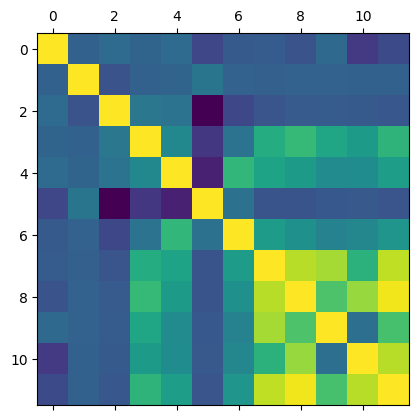

In [8]:
# Create a correlation heatmap using matplotlib
plt.matshow(numeric_df.corr())
plt.show()

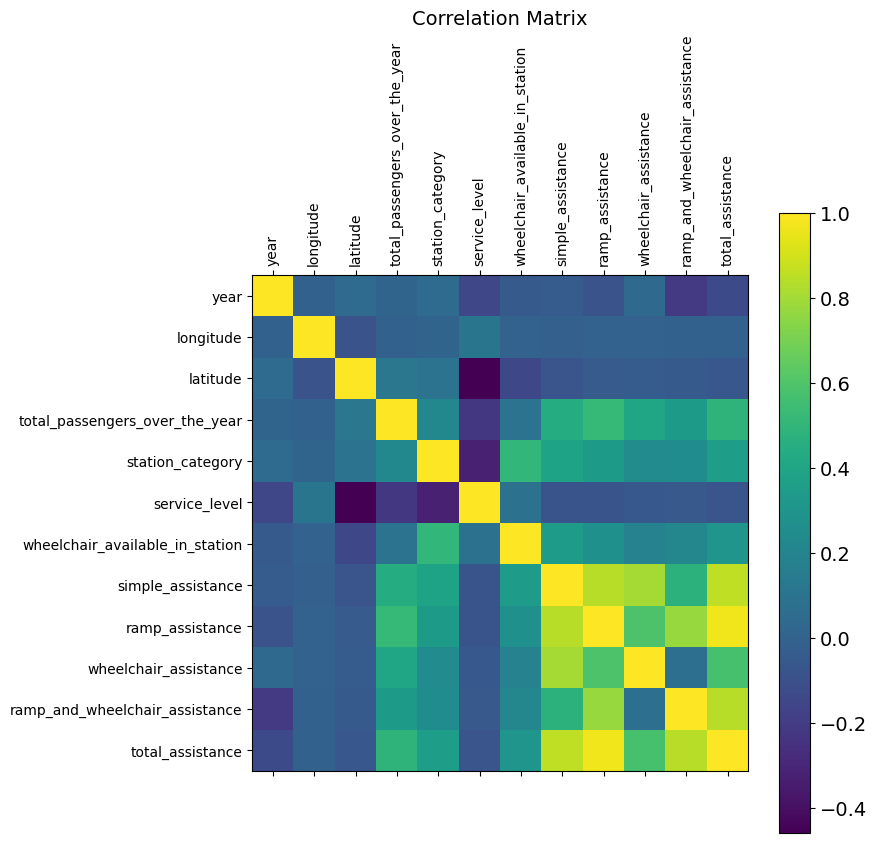

In [9]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(numeric_df.corr(), fignum=f.number) # type of plot
plt.xticks(range(numeric_df.shape[1]), numeric_df.columns, fontsize=10, rotation=90) # x axis labels
plt.yticks(range(numeric_df.shape[1]), numeric_df.columns, fontsize=10) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

plt.savefig(os.path.join(path, '04 Visualizations', 'Correlation Matrix.png')) 

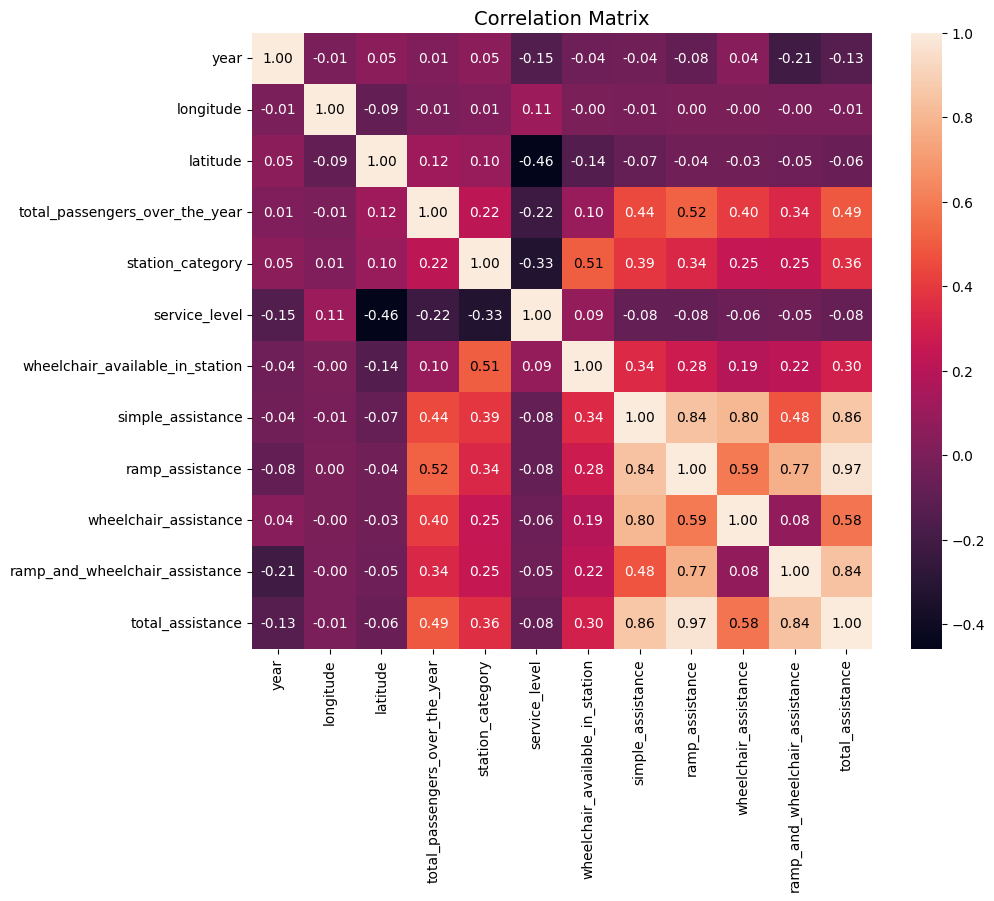

In [30]:
# Create the correlation matrix
corr_matrix = numeric_df.corr()

# Create a subplot with matplotlib
f, ax = plt.subplots(figsize=(10, 8))

# Create the heatmap
sns.heatmap(corr_matrix, annot=False, ax=ax)

# Define a threshold to distinguish dark and light cells
threshold = corr_matrix.max().max() / 2  # This is an example threshold

# Manually annotate each cell with the correlation coefficient
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        value = corr_matrix.iloc[i, j]
        text_color = "white" if value < threshold else "black"
        ax.text(j+0.5, i+0.5, f"{value:.2f}", 
                horizontalalignment='center', 
                verticalalignment='center', 
                color=text_color)

# Set title
plt.title('Correlation Matrix', fontsize=14)

# Show the plot
plt.show()

#### Create a correlation heatmap using seaborn:

In [23]:
# Create a data frame with just the columns we need (removing unrelevant variables)
numeric_reduced = numeric_df[['total_passengers_over_the_year','service_level','wheelchair_available_in_station','total_assistance']]
numeric_reduced.head()

,total_passengers_over_the_year,service_level,wheelchair_available_in_station,total_assistance
0,5443822,1,1,15193
1,34919689,1,1,17850
2,1924022,2,1,183
3,1001917,2,1,742
4,306218,3,0,183


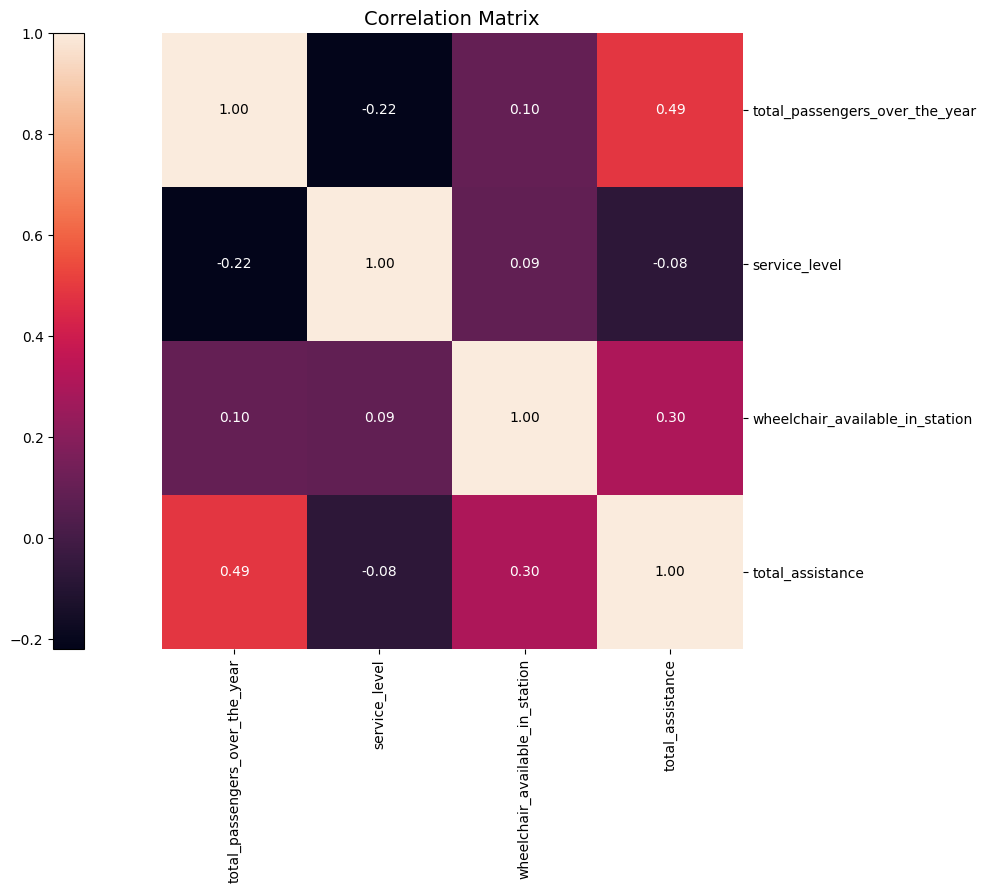

In [33]:
# Create the correlation matrix
corr_matrix = numeric_reduced.corr()

# Create a subplot with matplotlib
f, ax = plt.subplots(figsize=(10, 8))

# Create the heatmap
# Note: We set `cbar=False` to initially disable the color bar since we will draw it manually later
sns.heatmap(corr_matrix, annot=False, ax=ax, cbar=False)

# Manually add the color bar to the left side
cbar = ax.figure.colorbar(ax.collections[0], ax=ax, location='left')

# Define a threshold to distinguish dark and light cells for the text color
threshold = corr_matrix.max().max() / 2

# Manually annotate each cell with the correlation coefficient
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        value = corr_matrix.iloc[i, j]
        text_color = "white" if value < threshold else "black"
        ax.text(j+0.5, i+0.5, f"{value:.2f}", 
                horizontalalignment='center', 
                verticalalignment='center', 
                color=text_color)

# Set the title
plt.title('Correlation Matrix', fontsize=14)

# Swap the y-axis labels to the right
ax.yaxis.tick_right()
ax.yaxis.set_label_position('right')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Show the plot
plt.show()

#### Station Category vs. Other Variables:
Station_category has a strong positive correlation with wheelchair_available_in_station (0.517394), suggesting that the category of a station is associated with the availability of wheelchairs. It also has moderate positive correlations with assistance-related variables, indicating that higher station categories might offer more assistance services.

#### Service Level vs. Other Variables:
Service_level shows moderate negative correlations with latitude (-0.431390) and station_category (-0.342466), which may suggest that higher service levels are associated with certain geographical areas or lower categories of stations.

#### Assistance Services (Simple, Ramp, Wheelchair, Ramp & Wheelchair):
These variables are all positively correlated with each other, with simple_assistance and ramp_assistance having a very high correlation (0.819314), as do ramp_assistance and total_assistance (0.962621). This indicates that where there is simple assistance, there tends to be ramp assistance as well, and stations with ramp assistance tend to have higher overall assistance.

#### Total Assistance:
Total_assistance is highly correlated with ramp_assistance (0.962621) and ramp_and_wheelchair_assistance (0.811208), indicating that these two types of assistance contribute significantly to the total assistance available at a station.

### Scatterplots:

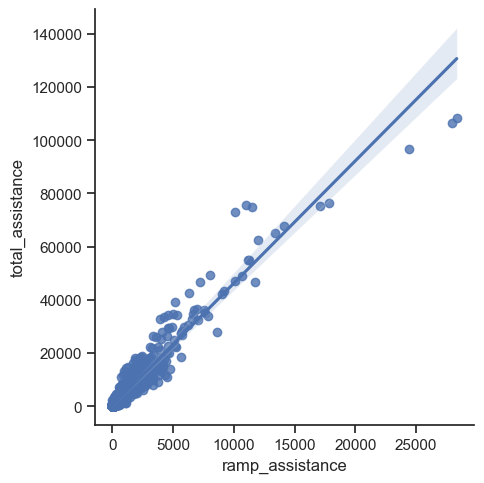

In [18]:
# Create a scatterplot for the "ramp_assistance" and "total_assistance" columns in seaborn
sns.lmplot(x = 'ramp_assistance', y = 'total_assistance', data = df)

This scatterplot visually confirms the strong positive correlation between "ramp_assistance" and "total_assistance", indicating that as the amount of ramp assistance increases, the total amount of assistance provided also increases, and this relationship is strong and linear.

#### Positive Linear Relationship:
There is a clear positive linear trend indicated by the data points. As "ramp_assistance" increases, "total_assistance" also increases.

#### Strength of Relationship:
The points are clustered closely around a line, which suggests a strong relationship between "ramp_assistance" and "total_assistance". This is consistent with the high correlation coefficient you provided earlier (0.962621).

#### Outliers:
There do not appear to be any significant outliers that are far removed from the trend of the data, which means that the relationship is consistent across the dataset.

#### Potential for Prediction:
Because of the strong relationship, it may be possible to predict "total_assistance" quite accurately based on "ramp_assistance" alone using a linear model.

#### Variation:
The variation in "total_assistance" seems to increase as "ramp_assistance" increases, indicated by the vertical spread of points becoming wider with higher values of "ramp_assistance". This could suggest that other factors in addition to "ramp_assistance" may influence "total_assistance", especially at higher levels of "ramp_assistance".

### Pair Plots:

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5409 entries, 0 to 5408
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   year                             5409 non-null   int64  
 1   station_code                     5409 non-null   string 
 2   station_name                     5409 non-null   object 
 3   region_sncf                      5409 non-null   object 
 4   departement                      5409 non-null   object 
 5   departement_code                 5409 non-null   object 
 6   zip_code                         5409 non-null   object 
 7   municipality                     5409 non-null   object 
 8   longitude                        5409 non-null   float64
 9   latitude                         5409 non-null   float64
 10  total_passengers_over_the_year   5409 non-null   int64  
 11  station_category                 5409 non-null   int64  
 12  service_level       

In [36]:
# Keep only the variables you want to use in the pair plot
sub = df[['total_passengers_over_the_year','simple_assistance', 'ramp_assistance', 'wheelchair_assistance', 'ramp_and_wheelchair_assistance', 'total_assistance']]

/Users/jorisjan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jorisjan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jorisjan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jorisjan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

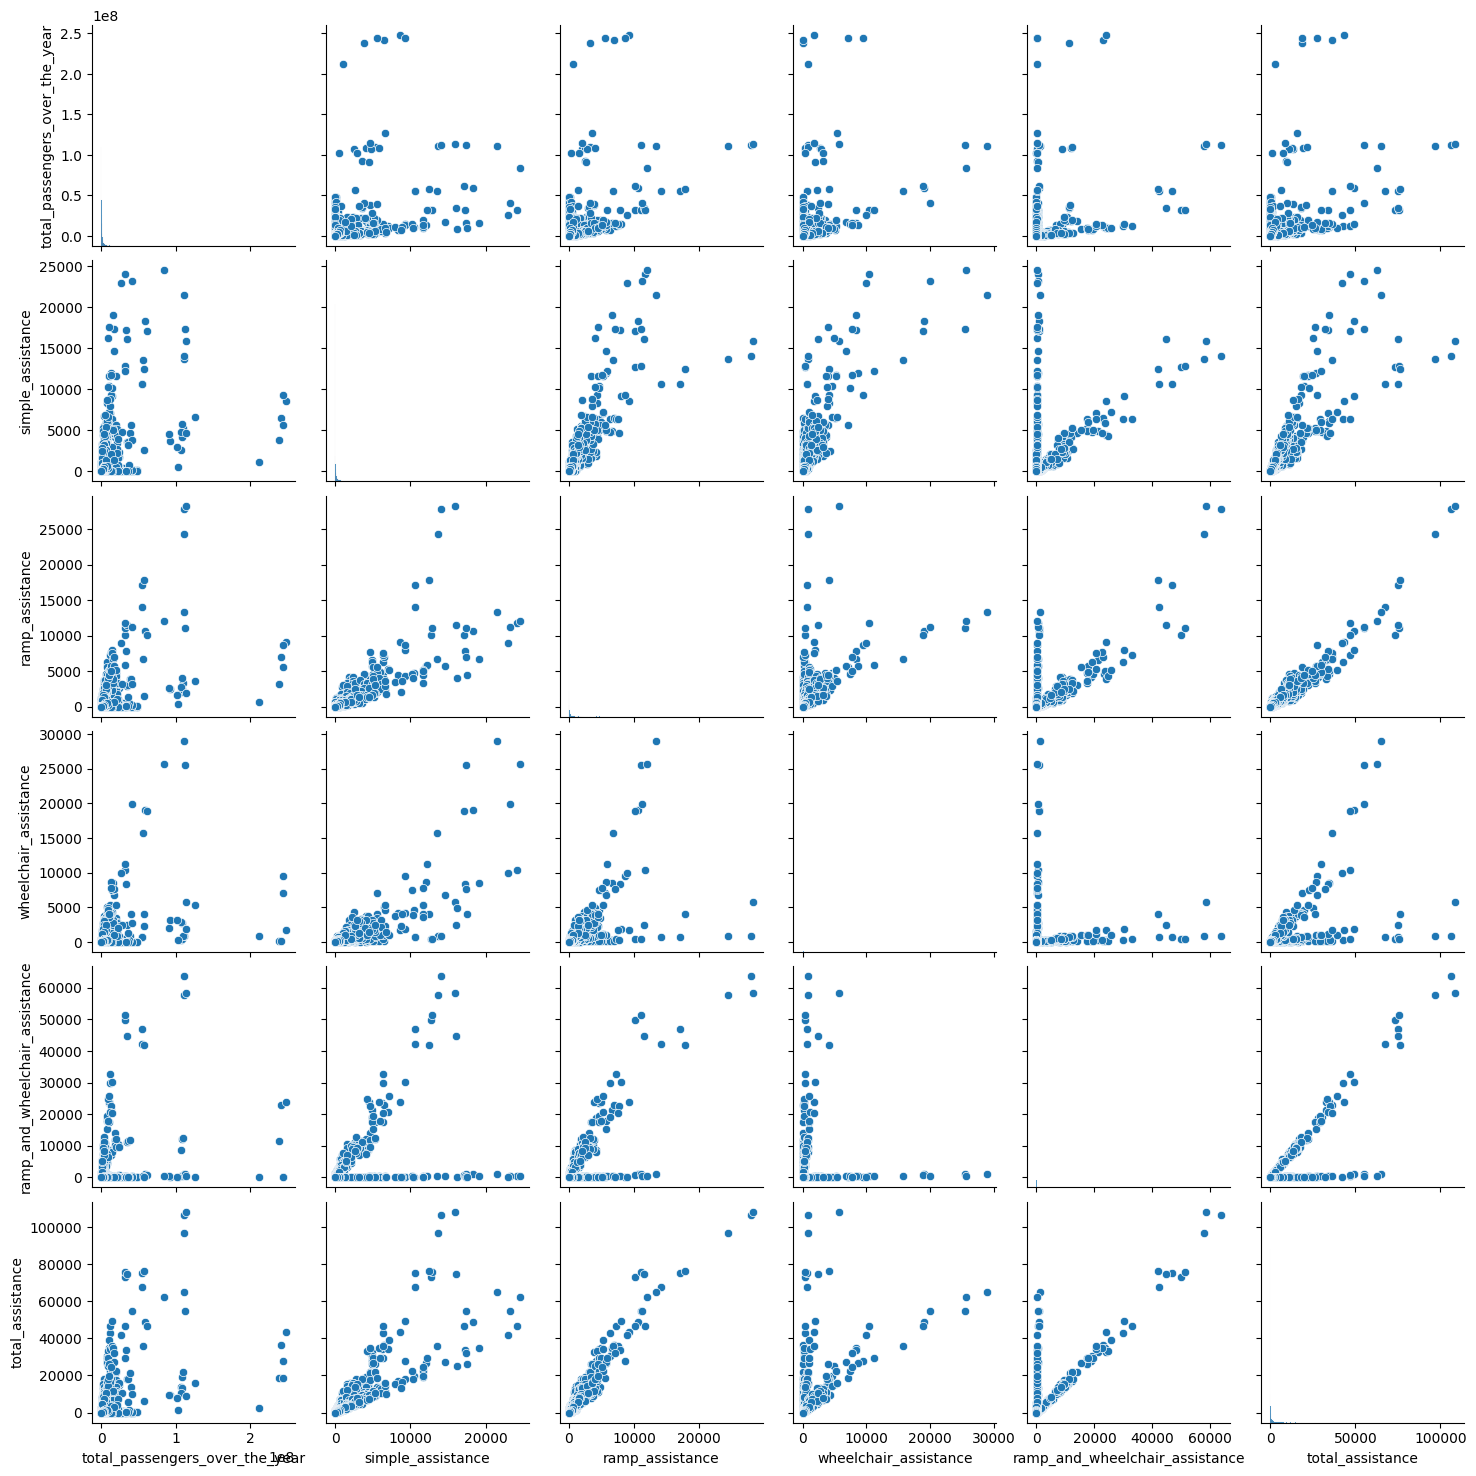

In [37]:
# Create a pair plot 
g = sns.pairplot(sub)

In [15]:
g.figure.savefig(os.path.join(path, '04 Visualizations', 'Pair Plots.png'))

#### Distribution of individual variables:
* It is evident that there is a strong positive relationship between 'ramp_assistance' and 'total_assistance', as seen in the previous single scatter plot. This relationship appears to be the strongest and most linear compared to others.
* 'simple_assistance' and 'ramp_assistance' also display a positive relationship, though with a more pronounced spread of data points. This suggests a strong but slightly less perfect linear relationship than that between 'ramp_assistance' and 'total_assistance'.
* 'wheelchair_assistance' shows a positive relationship with 'simple_assistance' and 'ramp_assistance', but the points are more dispersed, indicating a weaker linear relationship.

#### Variables to explore further:

* 'ramp_assistance' vs. 'total_assistance': Given the strong linear relationship, this pair is crucial for understanding the overall assistance efforts.
* 'simple_assistance' vs. 'total_assistance': While the relationship is strong, the spread of points suggests that other factors might influence the total assistance provided. It would be beneficial to explore what additional services or factors contribute to 'total_assistance' beyond 'simple_assistance'.
* 'wheelchair_assistance': This variable has less of a linear relationship with 'total_assistance' compared to 'ramp_assistance'. It would be interesting to explore why wheelchair assistance contributes differently to total assistance and if there are certain thresholds or conditions where it becomes more significant.

### Categorical Plots:

/Users/jorisjan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jorisjan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


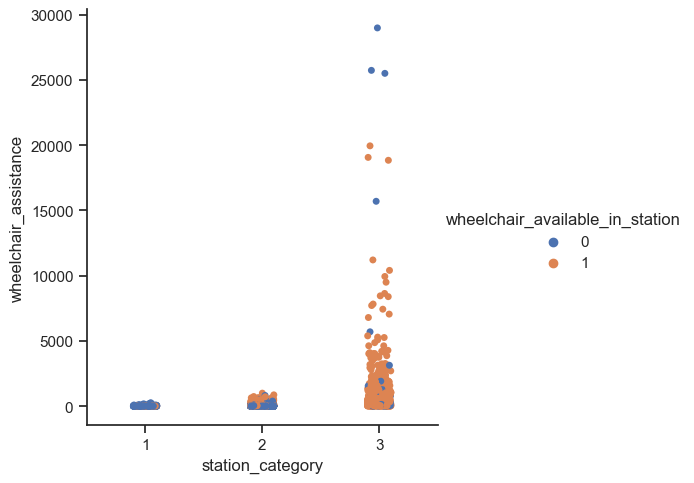

In [16]:
# Create a categorical plot in seaborn for the "station_category" and "wheelchair_assistance" columns in seaborn

sns.set(style="ticks")
categorical_plot = sns.catplot(x="station_category", y="wheelchair_assistance", hue="wheelchair_available_in_station", data=df) 

In [17]:
categorical_plot.figure.savefig(os.path.join(path, '04 Visualizations', 'Categorical Plot.png'))

The plot shows the relationship between 'station_category' (x-axis), 'wheelchair_assistance' (y-axis), and whether a wheelchairs are available in the station (indicated by the color, 0 means no and 1 means  yes).

#### Station Category Distribution:

**There are three categories of stations (1, 2, and 3):**
* Category 3: passenger stations of national interest. These are stations with at least 250,000 passengers a year on national and international passenger services, or where these same passengers account for 100% of the total.
* Category 2: passenger stations of regional interest. In each region, the management perimeter corresponds to all stations that do not belong to category A, but have a total ridership of at least 100,000 passengers per year.
* Category 1: passenger stations of local interest. Their management perimeter corresponds, in each region, to all the stations in this category. The fee is set, by region, for all stations in this category.
It appears that as the station category number increases, there is a wider range of 'wheelchair_assistance' values, with category 3 showing the most variation.

**Wheelchair Assistance:**
Across all station categories, there is a distribution of 'wheelchair_assistance' values, with a concentration towards the lower end but with some stations providing a higher level of assistance (notably stations of national interest).

**Wheelchair Availability:**
There seems to be a relatively even distribution of stations with and without wheelchair availability in terms of providing wheelchair assistances.
For category 3, there appears to be a larger number of stations that provide wheelchair assistance and also have a wheelchair available (orange points). There is also a noticeable concentration of stations providing high levels of wheelchair assistance that have wheelchairs available, but som of the stations performing the more assisstances are not equiped.

## Answers to Key Questions

**What is the trend in the total number of assistance provided to people with reduced mobility over the years 2015-2022?**
*This question cannot be answered for now.*

**How does the level of assistance vary among different station categories (3, 2, and 1)?**
The categorical plot suggests that higher station categories might be associated with a higher variance in the provision of 'wheelchair_assistance'. This could imply that the level of assistance varies more in these stations, possibly due to a wider range of services or infrastructure capabilities. Further analysis could be done to see if this trend holds for overall assistance.

**Are there any regional disparities in the provision of assistance services within the SNCF network?**
*This question cannot be answered for now.*

**Which stations have seen the most significant increase in assistance services over time?**
*This question cannot be answered for now.*

**What is the correlation between the station's passenger volume and the frequency/type of assistance provided?**
There is some correlation with assistance services.

**How does the availability of wheelchairs in stations affect the number and type of assistance provided?**
From the categorical plot, in higher category stations, the presence of wheelchairs is associated with higher levels of wheelchair assistance, suggesting that wheelchair availability does impact the type and possibly the number of assistance services provided.

**What impact does the departmental location (urban vs. rural) have on the level of service provided to people with reduced mobility?**
*This question cannot be answered for now.*

**Which stations have the highest and lowest ratios of wheelchair assistance to total assistance provided, and what might this indicate?**
*This question cannot be answered for now.*

**How does the service level of assistance correlate with the availability of assistance equipment (like wheelchairs) at stations?**
The correlation matrix and categorical plot suggest a relationship exists, particularly in higher category stations where wheelchair availability correlates with higher levels of assistance.

**What regression models can predict the demand for specific types of assistance based on station characteristics and historical data?**
We have identified that 'ramp_assistance' is highly correlated with 'total_assistance', which suggests that it could be a good predictor in a regression model. Further model building and validation would be necessary to develop a predictive model.

**Based on the analysis, what actionable recommendations can be made to improve the accessibility and quality of service for disabled individuals across the SNCF network?**
Based on the categorical plot, ensuring wheelchairs are available in higher category stations might improve the level of service provided. More comprehensive analysis including time-series and regression models would yield detailed recommendations.

### New questions that have arisen:

* Can we model the prediction of assistance demand based on a combination of station category, geographic location, and historical trends?
* What specific improvements in infrastructure or service could be recommended for stations with lower assistance ratios?

### Hypotheses

There are regional disparities in the provision of assistance services, with certain geographic areas receiving more assistance services than others, which could be influenced by urban vs. rural station locations.

There is a positive correlation between the station's passenger volume and the frequency/type of assistance provided.

Specific station characteristics (such as station category, availability of equipment, and geographic location) can be significant predictors of the demand for specific types of assistance.